In [2]:
import os
os.chdir("../")

In [3]:
import pandas as pd
import glob
from scipy.stats import ttest_ind

In [4]:
resultDir = 'results'
problem = 'cauctions' # choices=['setcover', 'cauctions', 'facilities', 'indset']
sampling_Strategies = ['uniform5','depthK','depthK2'] # choices: uniform5, depthK, depthK2, depthK3
sampling_seed = 0

In [5]:
sampleTimes_allStrategies = pd.DataFrame()
for sampling_Strategy in sampling_Strategies:
    problem_folders = {
        'setcover': f'setcover/500r_1000c_0.05d({sampling_Strategy})/{sampling_seed}',
        'cauctions': f'cauctions/100_500({sampling_Strategy})/{sampling_seed}',
        'facilities': f'facilities/100_100_5({sampling_Strategy})/{sampling_seed}',
        'indset': f'indset/500_4({sampling_Strategy})/{sampling_seed}',
    }
    problem_folder = problem_folders[problem]
    depthTablePath = f'data/samples/{problem_folder}/depthTable(trainSol).csv'
    depthTable = pd.read_csv(depthTablePath, index_col=0)
    sampleTimes_allStrategies[f'{sampling_Strategy}'] = depthTable['sampleTimes']

FileNotFoundError: [Errno 2] No such file or directory: 'data/samples/cauctions/100_500(depthK)/0/depthTable(trainSol).csv'

In [1]:
bin_size = 5
binned = sampleTimes_allStrategies.groupby(sampleTimes_allStrategies.index // bin_size).sum()
binned = binned / binned.sum()
binned['GroupName'] = [f"[{i*bin_size},{(i+1)*bin_size-1}]" for i in binned.index]
binned

NameError: name 'sampleTimes_allStrategies' is not defined

[Text(0, 0, '[35,39]'),
 Text(0, 1, '[30,34]'),
 Text(0, 2, '[25,29]'),
 Text(0, 3, '[20,24]'),
 Text(0, 4, '[15,19]'),
 Text(0, 5, '[10,14]'),
 Text(0, 6, '[5,9]'),
 Text(0, 7, '[0,4]')]

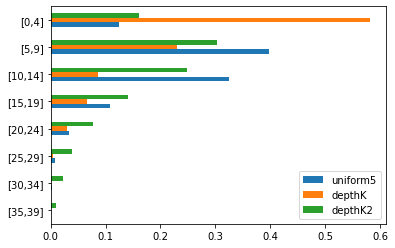

In [6]:
inv_bins = binned.sort_index(ascending=False)
axe = inv_bins.plot.barh()
axe.set_yticklabels(inv_bins['GroupName'])
# axe.savefig(f'depthDist{problem}.pdf')